In [ ]:
import tensorflow as tf
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate, GlobalAveragePooling2D, Reshape
from keras.utils import np_utils
from keras.models import Model
from keras.applications import ResNet50
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import xml.etree.ElementTree as ET
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import Model

In [ ]:
mapping = {
    "1_chongkong" : 0,
    "2_hanfeng" : 1,
    "3_yueyawan": 2,
    "4_shuiban": 3,
    "5_youban": 4,
    "6_siban": 5,
    "7_yiwu": 6,
    "8_yahen": 11,
    "9_zhehen": 7,
    "10_yaozhed": 8,
    "scratches": 9,
    "rolled-in_scale": 10
}
mapping2 = {
    0 : "Punching Hole",
    1 : "Welding Line",
    2 : "Crescent Gap",
    3 : "Water Spot",
    4 : "Oil Spot",
    5 : "Silk Spot",
    6 : "Inclusion",
    11 : "Rolled Pit",
    7 : "Crease",
    8 : "Waist Folding",
    9 : "Scratches",
    10 : "Rolled in Scale"
}

In [ ]:
X = []
y = []
X_train = []
y_train = []
X_val = []
y_val = []
w = int(2048/8)
l = int(1000/4)

In [ ]:
def get_annotations(directory):
    try:
        tree = ET.parse(directory)
        root = tree.getroot()
        boxes = []

        defect = -1
        objs = root.findall('object')
        for i in objs:
            name = i.find('name').text
            defect = mapping.get(name, 12)
            if defect != 12 and defect != 11:
                box = i.find('bndbox')
                xmin = float(box.find('xmin').text)
                ymin = float(box.find('ymin').text)
                xmax = float(box.find('xmax').text)
                ymax = float(box.find('ymax').text)
                
                if defect == -1:
                    return 0
                if xmin > xmax:
                    temp = xmin
                    xmin = xmax
                    xmax = temp
                if ymin > ymax:
                    temp = ymin
                    ymin = ymax
                    ymax = temp
                    
                box = []
                for i in range(5):
                    box.append(-1)
                box[0] = defect
                box[1] = (xmin)/8.0
                box[2] = (ymin)/4.0
                box[3] = (xmax)/8.0
                box[4] = (ymax)/4.0
                boxes.append(box)
            else:
                defect = -1
        if defect == -1:
            return 0
        return boxes
    except:
        return 0

Text(0.5, 1.0, 'Welding Line')

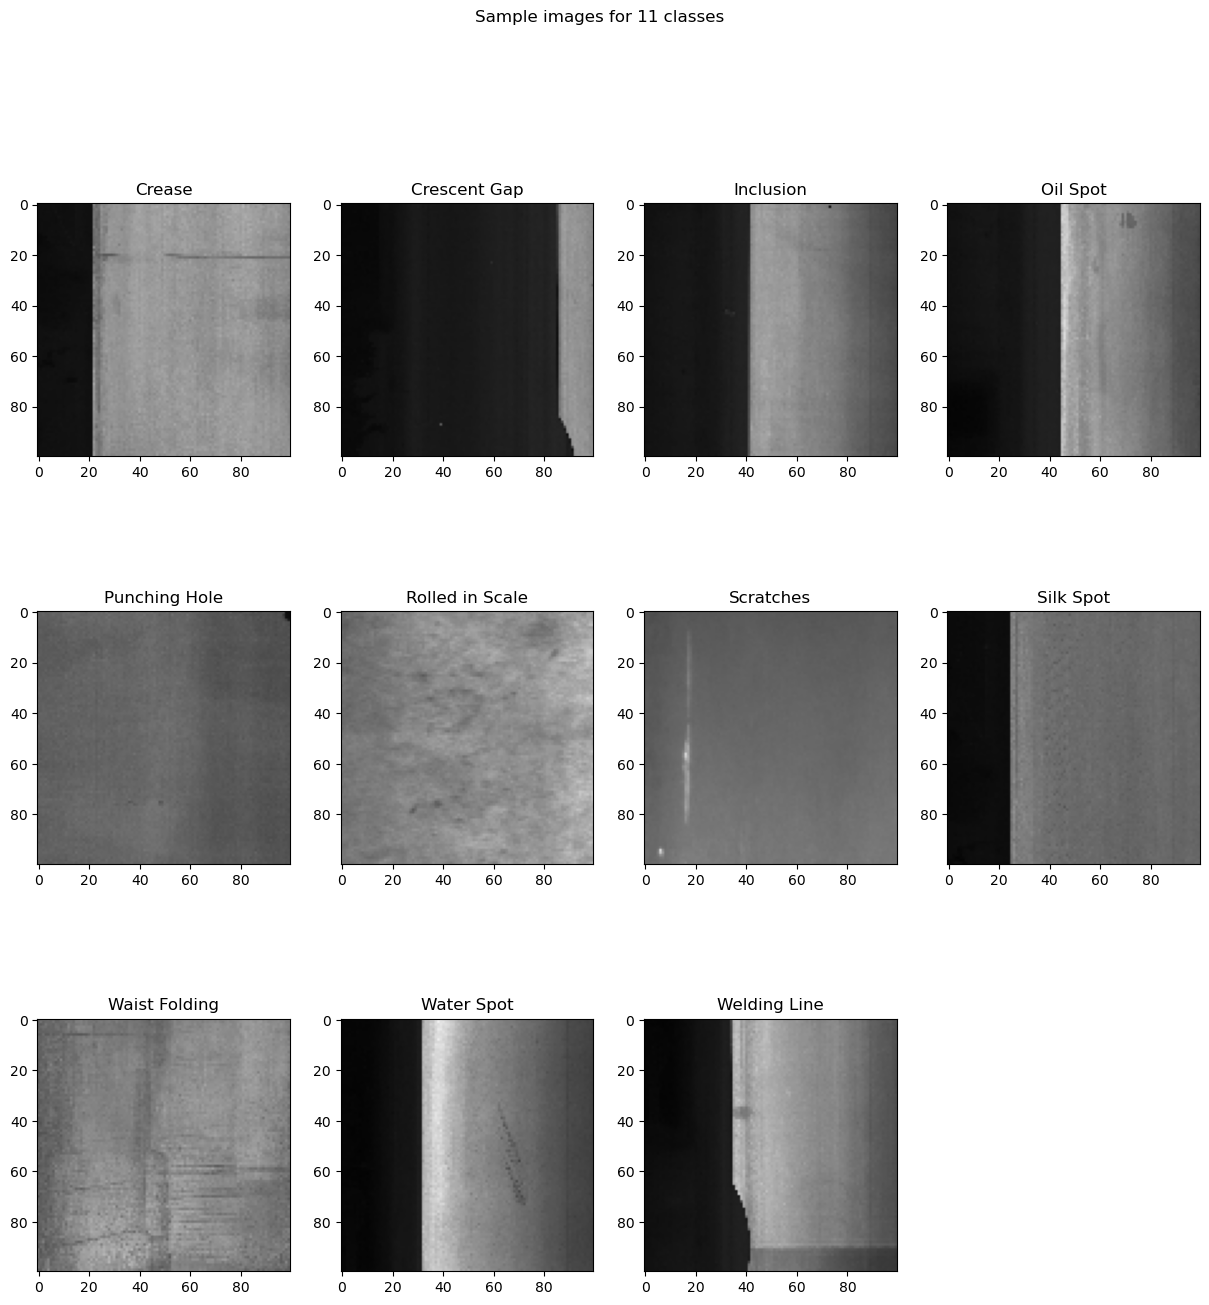

In [ ]:
#Displaying sample data for all classes
path ='gc10det/crease'
for img in os.listdir(path):
    img_array1 = cv2.imread(os.path.join(path,img))
    img_array1 = cv2.resize(img_array1, (100, 100))
    break

path ='gc10det/crescent_gap'
for img in os.listdir(path):
    img_array2 = cv2.imread(os.path.join(path,img))
    img_array2 = cv2.resize(img_array2, (100, 100))
    break
    
    
path ='gc10det/inclusion'
for img in os.listdir(path):
    img_array3 = cv2.imread(os.path.join(path,img))
    img_array3 = cv2.resize(img_array3, (100, 100))
    break
    
    
path ='gc10det/oil_spot'
for img in os.listdir(path):
    img_array4 = cv2.imread(os.path.join(path,img))
    img_array4 = cv2.resize(img_array4, (100, 100))
    break
    
path ='gc10det/punching_hole'
for img in os.listdir(path):
    img_array5 = cv2.imread(os.path.join(path,img))
    img_array5 = cv2.resize(img_array5, (100, 100))
    break
    
path ='gc10det/rolled_in_scale'
for img in os.listdir(path):
    img_array6 = cv2.imread(os.path.join(path,img))
    img_array6 = cv2.resize(img_array6, (100, 100))
    break

path ='gc10det/scratches'
for img in os.listdir(path):
    img_array7 = cv2.imread(os.path.join(path,img))
    img_array7 = cv2.resize(img_array7, (100, 100))
    break
    
    
path ='gc10det/silk_spot'
for img in os.listdir(path):
    img_array8 = cv2.imread(os.path.join(path,img))
    img_array8 = cv2.resize(img_array8, (100, 100))
    break
    
    
path ='gc10det/waist_folding'
for img in os.listdir(path):
    img_array9 = cv2.imread(os.path.join(path,img))
    img_array9 = cv2.resize(img_array9, (100, 100))
    break
    
path ='gc10det/water_spot'
for img in os.listdir(path):
    img_array10 = cv2.imread(os.path.join(path,img))
    img_array10 = cv2.resize(img_array10, (100, 100))
    break
    
path ='gc10det/welding_line'
for img in os.listdir(path):
    img_array11 = cv2.imread(os.path.join(path,img))
    img_array11 = cv2.resize(img_array11, (100, 100))
    break
    
fig = plt.figure(figsize=(15, 15))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[1, 1, 1], wspace=0.4,
                         hspace=0.4, height_ratios=[1, 1, 1, 1])
ax1 = fig.add_subplot(3, 4, 1)
ax1.imshow(img_array1, cmap='gray')
fig.suptitle("Sample images for 11 classes")
ax1.set_title("Crease")
ax2 = fig.add_subplot(3, 4, 2)
ax2.imshow(img_array2, cmap='gray')
ax2.set_title("Crescent Gap")
ax3 = fig.add_subplot(3, 4, 3)
ax3.imshow(img_array3, cmap='gray')
ax3.set_title("Inclusion")
ax4 = fig.add_subplot(3, 4, 4)
ax4.imshow(img_array4, cmap='gray')
ax4.set_title("Oil Spot")
ax5 = fig.add_subplot(3, 4, 5)
ax5.imshow(img_array5, cmap='gray')
ax5.set_title("Punching Hole")
ax6 = fig.add_subplot(3, 4, 6)
ax6.imshow(img_array6, cmap='gray')
ax6.set_title("Rolled in Scale")
ax7 = fig.add_subplot(3, 4, 7)
ax7.imshow(img_array7, cmap='gray')
ax7.set_title("Scratches")
ax8 = fig.add_subplot(3, 4, 8)
ax8.imshow(img_array8, cmap='gray')
ax8.set_title("Silk Spot")
ax9 = fig.add_subplot(3, 4, 9)
ax9.imshow(img_array9, cmap='gray')
ax9.set_title("Waist Folding")
ax10 = fig.add_subplot(3, 4, 10)
ax10.imshow(img_array10, cmap='gray')
ax10.set_title("Water Spot")
ax11 = fig.add_subplot(3, 4, 11)
ax11.imshow(img_array11, cmap='gray')
ax11.set_title("Welding Line")

In [ ]:
for i in range(1, 54):
    annotation = get_annotations(fr'lable/crease ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/crease/crease ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 227):
    annotation = get_annotations(fr'lable/crescent_gap ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/crescent_gap/crescent_gap ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 493):
    annotation = get_annotations(fr'lable/inclusion ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/inclusion/inclusion ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 205):
    annotation = get_annotations(fr'lable/oil_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/oil_spot/oil_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 220):
    annotation = get_annotations(fr'lable/punching_hole ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/punching_hole/punching_hole ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 277):
    annotation = get_annotations(fr'lable/rolled_in_scale ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/rolled_in_scale/rolled_in_scale ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 277):
    annotation = get_annotations(fr'lable/scratches ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/scratches/scratches ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 652):
    annotation = get_annotations(fr'lable/silk_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/silk_spot/silk_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 150):
    annotation = get_annotations(fr'lable/waist_folding ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/waist_folding/waist_folding ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 290):
    annotation = get_annotations(fr'lable/water_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/water_spot/water_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 274):
    annotation = get_annotations(fr'lable/welding_line ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/welding_line/welding_line ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
classes_train = []
dims_train = []
for i in range(len(y_train)):
    tmp_classes = []
    tmp_dims = []
    for j in range(len(y_train[i])):
        tmp_classes.append(y_train[i][j][0])
        tmp_dims.append(y_train[i][j][1:])
    classes_train.append(tmp_classes)
    dims_train.append(tmp_dims)

classes_val = []
dims_val = []
for i in range(len(y_val)):
    tmp_classes = []
    tmp_dims = []
    for j in range(len(y_val[i])):
        tmp_classes.append(y_val[i][j][0])
        tmp_dims.append(y_val[i][j][1:])
    classes_val.append(tmp_classes)
    dims_val.append(tmp_dims)

In [ ]:
X_train = np.array(X_train, dtype = 'float')
#X_test = np.array(X_test, dtype = 'float')
X_val = np.array(X_val, dtype = 'float')

X_train /= 255.0
#X_test /= 255
X_val/= 255.0

In [ ]:
def extract_min(lst, index):
    minn = 10000000
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            if lst[i][j][index] < minn:
                minn = lst[i][j][index]
    return minn

def extract_max(lst, index):
    maxx = -10000000
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            if lst[i][j][index] > maxx:
                maxx = lst[i][j][index]
    return maxx

In [ ]:
def maxminscaler(lst, maxx, minn, index):
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            lst[i][j][index] = (lst[i][j][index] - minn)/(maxx - minn)
    return lst

In [ ]:
xmin_min = extract_min(dims_train, 0)
xmin_max = extract_max(dims_train, 0)
xmax_min = extract_min(dims_train, 1)
xmax_max = extract_max(dims_train, 1)
ymin_min = extract_min(dims_train, 2)
ymin_max = extract_max(dims_train, 2)
ymax_min = extract_min(dims_train, 3)
ymax_max = extract_max(dims_train, 3)

In [ ]:
dims_train = maxminscaler(dims_train, xmin_min, xmin_max, 0)
dims_train = maxminscaler(dims_train, xmax_min, xmax_max, 1)
dims_train = maxminscaler(dims_train, ymin_min, ymin_max, 2)
dims_train = maxminscaler(dims_train, ymax_min, ymax_max, 3)

dims_val = maxminscaler(dims_val, xmin_min, xmin_max, 0)
dims_val = maxminscaler(dims_val, xmax_min, xmax_max, 1)
dims_val = maxminscaler(dims_val, ymin_min, ymin_max, 2)
dims_val = maxminscaler(dims_val, ymax_min, ymax_max, 3)



In [ ]:
maximum_defects = 0
for i in dims_val:
    if len(i) > maximum_defects:
        maximum_defects = len(i)
        
print(maximum_defects)

11


In [ ]:
def pad_dims(lst):
    pad = [-1, -1, -1, -1]
    for i in range(len(lst)):
        for _ in range(11 - len(lst[i])):
            lst[i].append(pad)
    return lst

def pad_classes(lst):
    pad = -1
    for i in range(len(lst)):
        for _ in range(11 - len(lst[i])):
            lst[i].append(pad)
    return lst

In [ ]:
dims_train = pad_dims(dims_train)
dims_val = pad_dims(dims_val)
classes_train = pad_classes(classes_train)
classes_val = pad_classes(classes_val)

In [ ]:
num_classes = 12

for i in range(len(classes_train)):
    classes_train[i] = np.array(classes_train[i], dtype = 'float').astype('float64').reshape((-1,1))
    classes_train[i] = np_utils.to_categorical(classes_train[i], num_classes=num_classes)

for i in range(len(dims_train)):
    dims_train[i] = np.array(dims_train[i], dtype = 'float')

for i in range(len(classes_val)):
    classes_val[i] = np.array(classes_val[i], dtype = 'float').astype('float64').reshape((-1,1))
    classes_val[i] = np_utils.to_categorical(classes_val[i], num_classes=num_classes)

for i in range(len(dims_val)):
    dims_val[i] = np.array(dims_val[i], dtype = 'float')

num_regressors = 4

In [ ]:
for i in range(len(dims_val)):
    if (len(dims_val[i])!=11):
        print(i)
    #print(len(i))
#dims_val[288]

In [ ]:
print(len(dims_train[0]))
dims_train = np.array(dims_train, dtype = 'float')
dims_val = np.array(dims_val, dtype = 'float')
classes_train = np.array(classes_train, dtype = 'float')
classes_val = np.array(classes_val, dtype = 'float')

11


In [ ]:
pre_trained_model = InceptionV3(include_top = False, 
                                weights = 'imagenet')

for layer in pre_trained_model.layers[:-10]:
    layer.trainable = False
for layer in pre_trained_model.layers[-10:]:
    layer.trainable = True

In [ ]:
input_shape = (l, w, 3)

inputs = Input(shape=input_shape)

l1 = pre_trained_model(inputs)

flatten = GlobalAveragePooling2D()(l1)

dense_class1 = Dense(128, activation='relu')(flatten)
dense_class2 = Dense(64, activation='relu')(dense_class1)
output_class = Dense(11*12, activation='softmax')(dense_class2)
output_class = Reshape((11, 12), name='class_output')(output_class)

dense_reg1 = Dense(1024, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense_reg1)
dense_reg2 = Dense(1024, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense_reg2)
output_reg = Dense(11*4)(dropout2)
output_reg = Reshape((11, 4), name='reg_output')(output_reg)

#combined_output = concatenate([output_class, output_reg])

model = Model(inputs=inputs, outputs=[output_class, output_reg])

model.compile(optimizer='adam',
              loss={'class_output': 'categorical_crossentropy',
                    'reg_output': 'mse'},
              loss_weights={'class_output': 0.1, 'reg_output': 1.0},
              metrics={'class_output': 'accuracy',
                       'reg_output': 'mae'})

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input_2[0][0]']                
                                2048)                                                             
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['inception_v3[0][0]']           
 alAveragePooling2D)                                                                          

In [ ]:
H = model.fit(X_train, {'class_output': classes_train, 'reg_output': dims_train},
                    validation_data=(X_val, {'class_output': classes_val, 'reg_output': dims_val}),
                    batch_size=8, epochs=60)
model.save("annotations_multi.h5")

Epoch 1/60
230/230 [==============================] - 73s 318ms/step - loss: 0.0374 - class_output_loss: 0.0023 - reg_output_loss: 0.0372 - class_output_accuracy: 0.9996 - reg_output_mae: 0.0792 - val_loss: 0.1294 - val_class_output_loss: 0.4560 - val_reg_output_loss: 0.0838 - val_class_output_accuracy: 0.9402 - val_reg_output_mae: 0.0962
Epoch 2/60
230/230 [==============================] - 72s 313ms/step - loss: 0.0383 - class_output_loss: 0.0012 - reg_output_loss: 0.0382 - class_output_accuracy: 0.9999 - reg_output_mae: 0.0789 - val_loss: 0.1286 - val_class_output_loss: 0.4531 - val_reg_output_loss: 0.0833 - val_class_output_accuracy: 0.9421 - val_reg_output_mae: 0.1033
Epoch 3/60
230/230 [==============================] - 73s 316ms/step - loss: 0.0389 - class_output_loss: 6.1981e-04 - reg_output_loss: 0.0388 - class_output_accuracy: 1.0000 - reg_output_mae: 0.0810 - val_loss: 0.1306 - val_class_output_loss: 0.4626 - val_reg_output_loss: 0.0843 - val_class_output_accuracy: 0.9420 - 

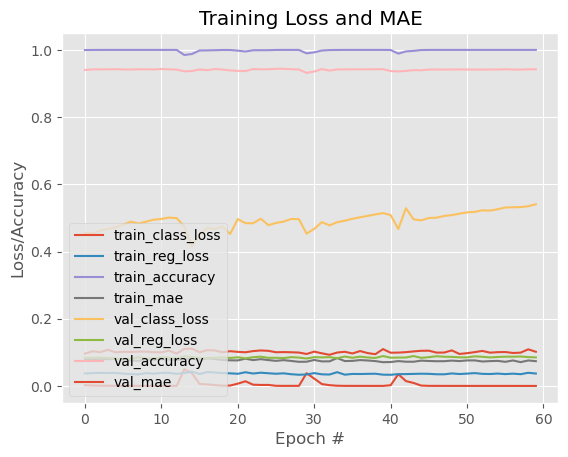

In [ ]:
N = 60
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["class_output_loss"], label="train_class_loss")
plt.plot(np.arange(0, N), H.history["reg_output_loss"], label="train_reg_loss")
plt.plot(np.arange(0, N), H.history["class_output_accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["reg_output_mae"], label="train_mae")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["val_class_output_loss"], label="val_class_loss")
plt.plot(np.arange(0, N), H.history["val_reg_output_loss"], label="val_reg_loss")
plt.plot(np.arange(0, N), H.history["val_class_output_accuracy"], label="val_accuracy")
plt.plot(np.arange(0, N), H.history["val_reg_output_mae"], label="val_mae")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
#model = load_model("annotations_best.h5")
img_test = cv2.imread(r'gc10det/oil_spot/oil_spot (100).jpg')
img_test = cv2.resize(img_test, (w, l))
img_test = [img_test]
img_test = np.array(img_test, dtype = 'float')
img_test /= 255
p=model.predict(img_test)
print(p[0][0][1])
#print(get_annotations("lable/water_spot (70).xml"))

1/1 [==============================] - 0s 105ms/step
[4.0394323e-32 1.9034624e-24 1.0645186e-20 4.2521125e-24 1.4940414e-02
 5.1419630e-14 6.1313598e-25 8.6878343e-17 3.9290960e-32 2.0377306e-29
 3.1647447e-28 2.8026728e-22]


In [ ]:
def img_format(img):
    imgf = cv2.imread(img)
    imgf = cv2.resize(imgf, (w, l))
    imgf = [imgf]
    imgf = np.array(imgf, dtype = 'float')
    imgf /= 255
    return imgf

In [ ]:
a = get_annotations(r'gc10det/water_spot/water_spot (50).jpg')
print(a)

0


In [ ]:
data_dir = 'gc10det'
class_names = sorted([subdir for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subdir))])
num_classes = len(class_names)
#print(class_names[11])
for i in range(len(class_names)):
    for j in range(len(class_names[i])):
        img= f'gc10det/{class_names[i]}/{class_names[i]} ({j}).jpg'
        print(img)

gc10det/crease/crease (0).jpg
gc10det/crease/crease (1).jpg
gc10det/crease/crease (2).jpg
gc10det/crease/crease (3).jpg
gc10det/crease/crease (4).jpg
gc10det/crease/crease (5).jpg
gc10det/crescent_gap/crescent_gap (0).jpg
gc10det/crescent_gap/crescent_gap (1).jpg
gc10det/crescent_gap/crescent_gap (2).jpg
gc10det/crescent_gap/crescent_gap (3).jpg
gc10det/crescent_gap/crescent_gap (4).jpg
gc10det/crescent_gap/crescent_gap (5).jpg
gc10det/crescent_gap/crescent_gap (6).jpg
gc10det/crescent_gap/crescent_gap (7).jpg
gc10det/crescent_gap/crescent_gap (8).jpg
gc10det/crescent_gap/crescent_gap (9).jpg
gc10det/crescent_gap/crescent_gap (10).jpg
gc10det/crescent_gap/crescent_gap (11).jpg
gc10det/inclusion/inclusion (0).jpg
gc10det/inclusion/inclusion (1).jpg
gc10det/inclusion/inclusion (2).jpg
gc10det/inclusion/inclusion (3).jpg
gc10det/inclusion/inclusion (4).jpg
gc10det/inclusion/inclusion (5).jpg
gc10det/inclusion/inclusion (6).jpg
gc10det/inclusion/inclusion (7).jpg
gc10det/inclusion/inclusio

In [ ]:
def extract_min(lst, index):
    minn = 10000000
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            if lst[i][j][index] < minn:
                minn = lst[i][j][index]
    return minn

def extract_max(lst, index):
    maxx = -10000000
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            if lst[i][j][index] > maxx:
                maxx = lst[i][j][index]
    return maxx

In [ ]:
def inv_minmax_scaler(val, minn, maxx):
    return ((val *(maxx-minn))+ minn)

In [ ]:

def pltt(img):
    for i in range(11):
        if (pred[1][0][i][0]<0):
            continue
        name = np.argmax(pred[0][0][i])
        xmin = inv_minmax_scaler(pred[1][0][i][0], xmin_min, xmin_max)
        ymin = inv_minmax_scaler(pred[1][0][i][1], ymin_min, ymin_max)
        xmax = inv_minmax_scaler(pred[1][0][i][2], xmax_min, xmax_max)
        ymax = inv_minmax_scaler(pred[1][0][i][3], ymax_min, ymax_max)
        #print(xmin, ymin, xmax, ymax)
        
        width_rec = xmax-xmin
        height_rec= ymax-ymin




        rect = plt.Rectangle((xmin, ymin), width_rec, height_rec, fill=False, edgecolor='red')
        ax.add_patch(rect)
        plt.text(xmin+width_rec/2, ymin+height_rec/2, 'pred', color='red', ha='center', va='center')
        plt.text(xmin, ymin, mapping2.get(name, "Unknown") , color='red', ha='center', va='bottom')

        

In [ ]:
def plot(img_path, real, pred):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (w, l))
    img = np.array(img)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, cmap = 'gray')
    
    for i in range(11):
        if (pred[1][0][i][0]<0):
            continue
        name = np.argmax(pred[0][0][i])
        xmin = inv_minmax_scaler(pred[1][0][i][0], xmin_min, xmin_max)
        ymin = inv_minmax_scaler(pred[1][0][i][1], ymin_min, ymin_max)
        xmax = inv_minmax_scaler(pred[1][0][i][2], xmax_min, xmax_max)
        ymax = inv_minmax_scaler(pred[1][0][i][3], ymax_min, ymax_max)
        #print(xmin, ymin, xmax, ymax)
        
        width_rec = xmax-xmin
        height_rec= ymax-ymin




        rect = plt.Rectangle((xmin, ymin), width_rec, height_rec, fill=False, edgecolor='red')
        ax.add_patch(rect)
        plt.text(xmin+width_rec/2, ymin+height_rec/2, 'pred', color='red', ha='center', va='center')
        plt.text(xmin, ymin, mapping2.get(name, "Unknown") , color='red', ha='center', va='bottom')

    
    for i in range(len(real)):
        name = real[i][0]
        xmin = real[i][1]
        ymin = real[i][2]
        xmax = real[i][3]
        ymax = real[i][4]
    
        #print(xmin, ymin, xmax, ymax)
        width_rec = xmax - xmin
        height_rec = ymax - ymin

        rect2 = plt.Rectangle((xmin, ymin), width_rec, height_rec, fill=False, edgecolor='blue')
        ax.add_patch(rect2)
        plt.text(xmin+width_rec/2, ymin+height_rec/2, 'real', color='blue', ha='center', va='center')
        plt.text(xmin, ymin, mapping2.get(name, "Unknown"), color='blue', ha='center', va='bottom')

    plt.show()

In [1]:
# img = r'gc10det/oil_spot/oil_spot (32).jpg'
# annot = "lable/oil_spot (32).xml"
# preds = model.predict(img_format(img))
# print(preds)
# print(get_annotations(annot))
# plot(img, get_annotations(annot), preds)

In [2]:
# for i in range(len(x_test)):
#     x_test = x_test[i]
#     real_val= y_test[i]
#     random_img= X[i]
#     random_img=[random_img]
#     random_img = np.array(random_img, dtype = 'float')
#     random_img/=255
#     prediction = model.predict(random_img)
#     yhat = np.argmax(prediction)
#     predictions.append(yhat)
#     if yhat!= real_val:
#         incorrect_predictions+=1
        
# print(incorrect_predictions)
# print(DataSet_length)
# tf.math.confusion_matrix(y, predictions)